In [2]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/churn-prediction/Churn_Modelling.csv


In [3]:
df=pd.read_csv("/kaggle/input/churn-prediction/Churn_Modelling.csv")

In [4]:
df

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,9996,15606229,Obijiaku,771,France,Male,39,5,0.00,2,1,0,96270.64,0
9996,9997,15569892,Johnstone,516,France,Male,35,10,57369.61,1,1,1,101699.77,0
9997,9998,15584532,Liu,709,France,Female,36,7,0.00,1,0,1,42085.58,1
9998,9999,15682355,Sabbatini,772,Germany,Male,42,3,75075.31,2,1,0,92888.52,1


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


In [6]:
df.duplicated().sum()

0

In [7]:
df.columns=df.columns.str.lower()

In [8]:
df

,rownumber,customerid,surname,creditscore,geography,gender,age,tenure,balance,numofproducts,hascrcard,isactivemember,estimatedsalary,exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,9996,15606229,Obijiaku,771,France,Male,39,5,0.00,2,1,0,96270.64,0
9996,9997,15569892,Johnstone,516,France,Male,35,10,57369.61,1,1,1,101699.77,0
9997,9998,15584532,Liu,709,France,Female,36,7,0.00,1,0,1,42085.58,1
9998,9999,15682355,Sabbatini,772,Germany,Male,42,3,75075.31,2,1,0,92888.52,1


In [9]:
df['gender'].unique()

array(['Female', 'Male'], dtype=object)

In [10]:
df['geography'].unique()

array(['France', 'Spain', 'Germany'], dtype=object)

In [11]:
df['surname'].nunique()

2932

In [12]:
X=df.drop(columns="exited")
y=df.exited.copy()

In [13]:
from sklearn.model_selection import train_test_split

In [14]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)


In [15]:
X_test

,rownumber,customerid,surname,creditscore,geography,gender,age,tenure,balance,numofproducts,hascrcard,isactivemember,estimatedsalary
6252,6253,15687492,Anderson,596,Germany,Male,32,3,96709.07,2,0,0,41788.37
4684,4685,15736963,Herring,623,France,Male,43,1,0.00,2,1,1,146379.30
1731,1732,15721730,Amechi,601,Spain,Female,44,4,0.00,2,1,0,58561.31
4742,4743,15762134,Liang,506,Germany,Male,59,8,119152.10,2,1,1,170679.74
4521,4522,15648898,Chuang,560,Spain,Female,27,7,124995.98,1,1,1,114669.79
...,...,...,...,...,...,...,...,...,...,...,...,...,...
6412,6413,15598982,Klein,602,Germany,Female,53,5,98268.84,1,0,1,45038.29
8285,8286,15572631,Ndubuisi,609,France,Male,25,10,0.00,1,0,1,109895.16
7853,7854,15746674,Miller,730,France,Female,47,7,0.00,1,1,0,33373.26
1095,1096,15689081,Wu,692,France,Male,29,4,0.00,1,1,0,76755.99


**Now we will mostly be working with train set and use validation set later for hyperparamter tuning**

**Exploratory Data Analysis**

In [16]:
import seaborn as sns
import matplotlib.pyplot as plt

In [17]:
traindf=X_train.join(y_train)

In [18]:
traindf

,rownumber,customerid,surname,creditscore,geography,gender,age,tenure,balance,numofproducts,hascrcard,isactivemember,estimatedsalary,exited
9254,9255,15601116,P'an,686,France,Male,32,6,0.00,2,1,1,179093.26,0
1561,1562,15766374,Leak,632,Germany,Male,42,4,119624.60,2,1,1,195978.86,0
1670,1671,15716994,Green,559,Spain,Male,24,3,114739.92,1,1,0,85891.02,1
6087,6088,15730759,Chukwudi,561,France,Female,27,9,135637.00,1,1,0,153080.40,1
6669,6670,15797900,Chinomso,517,France,Male,56,9,142147.32,1,0,0,39488.04,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5734,5735,15596647,Henderson,768,France,Male,54,8,69712.74,1,1,1,69381.05,0
5191,5192,15681075,Chukwualuka,682,France,Female,58,1,0.00,1,1,1,706.50,0
5390,5391,15573851,Macrossan,735,France,Female,38,1,0.00,3,0,0,92220.12,1
860,861,15807663,McGregor,667,France,Male,43,8,190227.46,1,1,0,97508.04,1


In [19]:
traindf.describe(include="number")

,rownumber,customerid,creditscore,age,tenure,balance,numofproducts,hascrcard,isactivemember,estimatedsalary,exited
count,8000.000000,8.000000e+03,8000.000000,8000.000000,8000.000000,8000.000000,8000.000000,8000.000000,8000.000000,8000.000000,8000.000000
mean,5012.506875,1.569067e+07,651.647625,38.897750,5.003875,76102.139645,1.531375,0.703500,0.512750,100431.289764,0.205500
std,2887.649416,7.184743e+04,96.366200,10.518953,2.881822,62461.005757,0.579705,0.456743,0.499869,57518.920431,0.404092
min,2.000000,1.556570e+07,350.000000,18.000000,0.000000,0.000000,1.000000,0.000000,0.000000,90.070000,0.000000
25%,2512.750000,1.562822e+07,585.000000,32.000000,3.000000,0.000000,1.000000,0.000000,0.000000,51364.125000,0.000000
50%,5014.500000,1.569074e+07,653.000000,37.000000,5.000000,96447.520000,1.000000,1.000000,1.000000,100487.720000,0.000000
75%,7505.250000,1.575316e+07,719.000000,44.000000,7.000000,127611.332500,2.000000,1.000000,1.000000,149595.842500,0.000000
max,10000.000000,1.581566e+07,850.000000,92.000000,10.000000,250898.090000,4.000000,1.000000,1.000000,199970.740000,1.000000


In [20]:
traindf.describe(include='O')

,surname,geography,gender
count,8000,8000,8000
unique,2618,3,2
top,Shih,France,Male
freq,24,3994,4362


**let's look at outliers**

In [21]:
from sklearn.ensemble import IsolationForest
forest=IsolationForest(n_estimators=10,random_state=42)

In [22]:

temp=traindf.drop(columns='exited').select_dtypes(include="number")
forest.fit(temp)
outliers = forest.predict(temp)

# Adding the results to the original dataset
print(type(outliers))


<class 'numpy.ndarray'>


In [23]:
np.count_nonzero(outliers == -1)

5079

In [24]:
traindf.columns

Index(['rownumber', 'customerid', 'surname', 'creditscore', 'geography',
       'gender', 'age', 'tenure', 'balance', 'numofproducts', 'hascrcard',
       'isactivemember', 'estimatedsalary', 'exited'],
      dtype='object')

In [25]:
traindf.info()

<class 'pandas.core.frame.DataFrame'>
Index: 8000 entries, 9254 to 7270
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   rownumber        8000 non-null   int64  
 1   customerid       8000 non-null   int64  
 2   surname          8000 non-null   object 
 3   creditscore      8000 non-null   int64  
 4   geography        8000 non-null   object 
 5   gender           8000 non-null   object 
 6   age              8000 non-null   int64  
 7   tenure           8000 non-null   int64  
 8   balance          8000 non-null   float64
 9   numofproducts    8000 non-null   int64  
 10  hascrcard        8000 non-null   int64  
 11  isactivemember   8000 non-null   int64  
 12  estimatedsalary  8000 non-null   float64
 13  exited           8000 non-null   int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.2+ MB


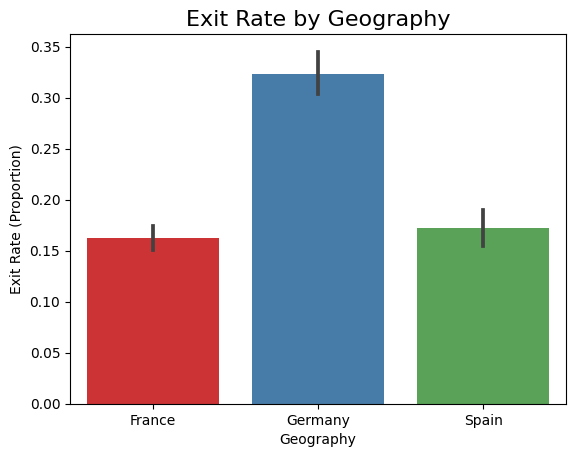

In [26]:
# Bar plot showing the mean exit rate per geography
sns.barplot(x='geography', y='exited', data=traindf, palette='Set1')

# Add title and labels
plt.title('Exit Rate by Geography', fontsize=16)
plt.xlabel('Geography')
plt.ylabel('Exit Rate (Proportion)')
plt.show()


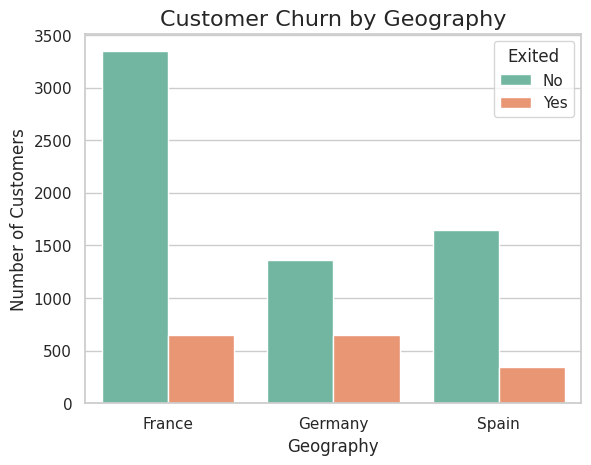

In [27]:
import seaborn as sns
import matplotlib.pyplot as plt

# Set a theme for aesthetics
sns.set_theme(style="whitegrid")

# Count plot for geography vs exited
sns.countplot(data=traindf, x='geography', hue='exited', palette='Set2')

# Add title and labels
plt.title('Customer Churn by Geography', fontsize=16)
plt.xlabel('Geography')
plt.ylabel('Number of Customers')
plt.legend(title='Exited', loc='upper right', labels=['No', 'Yes'])
plt.show()


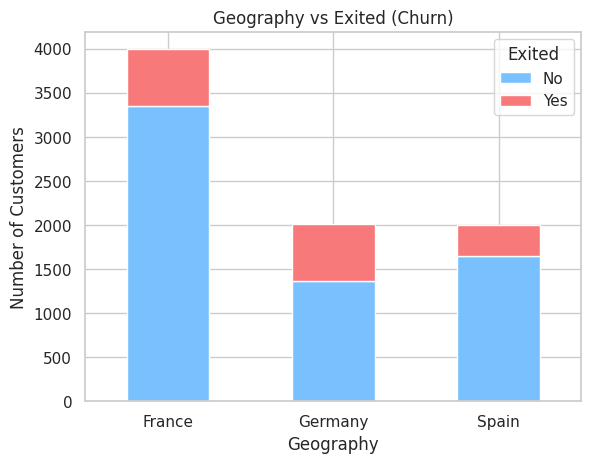

Chi-Square Statistic: 230.747891518929
P-value: 7.829463453768007e-51
Reject the null hypothesis: Geography and Exited are dependent.


In [28]:
from scipy.stats import chi2_contingency


# Assuming 'data' is your dataframe with lowercase column names already applied

# Step 1: Create a cross-tabulation (contingency table) of Geography vs Exited
geo_vs_exited = pd.crosstab(traindf['geography'], traindf['exited'])

# Step 2: Visualize the relationship with a bar plot
geo_vs_exited.plot(kind='bar', stacked=True, color=['#79c0ff', '#f87979'])
plt.title('Geography vs Exited (Churn)')
plt.xlabel('Geography')
plt.ylabel('Number of Customers')
plt.legend(title='Exited', labels=['No', 'Yes'])
plt.xticks(rotation=0)
plt.show()

# Step 3: Perform Chi-Square test for independence
chi2, p, dof, expected = chi2_contingency(geo_vs_exited)

# Step 4: Output the results
print(f"Chi-Square Statistic: {chi2}")
print(f"P-value: {p}")

# Step 5: Interpret the result
alpha = 0.05  # significance level
if p < alpha:
    print("Reject the null hypothesis: Geography and Exited are dependent.")
else:
    print("Fail to reject the null hypothesis: No significant relationship between Geography and Exited.")


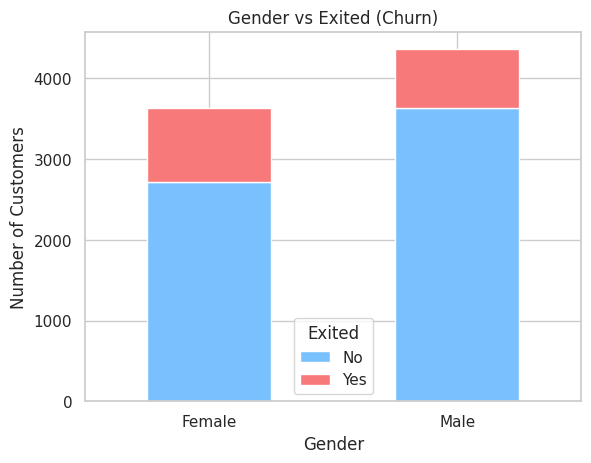

Chi-Square Statistic: 90.17253634465192
P-value: 2.182709462204224e-21
Reject the null hypothesis: Gender and Exited are dependent.


In [29]:

from scipy.stats import chi2_contingency


# Assuming 'data' is your dataframe with lowercase column names already applied

# Step 1: Create a cross-tabulation (contingency table) of Geography vs Exited
gend_vs_exited = pd.crosstab(traindf['gender'],traindf['exited'])

# Step 2: Visualize the relationship with a bar plot
gend_vs_exited.plot(kind='bar', stacked=True, color=['#79c0ff', '#f87979'])
plt.title('Gender vs Exited (Churn)')
plt.xlabel('Gender')
plt.ylabel('Number of Customers')
plt.legend(title='Exited', labels=['No', 'Yes'])
plt.xticks(rotation=0)
plt.show()

# Step 3: Perform Chi-Square test for independence
chi2, p, dof, expected = chi2_contingency(gend_vs_exited)

# Step 4: Output the results
print(f"Chi-Square Statistic: {chi2}")
print(f"P-value: {p}")

# Step 5: Interpret the result
alpha = 0.05  # significance level
if p < alpha:
    print("Reject the null hypothesis: Gender and Exited are dependent.")
else:
    print("Fail to reject the null hypothesis: No significant relationship between Gender and Exited.")


In [30]:
traindf.exited.value_counts()

exited
0    6356
1    1644
Name: count, dtype: int64

In [31]:

from scipy.stats import chi2_contingency

# Assuming 'data' is your dataframe with lowercase column names already applied

# Step 1: Create a cross-tabulation (contingency table) of Geography vs Exited
sur_vs_exited = pd.crosstab(traindf['surname'], traindf['exited'])

# Step 2: Visualize the rela

# Step 3: Perform Chi-Square test for independence
chi2, p, dof, expected = chi2_contingency(sur_vs_exited)

# Step 4: Output the results
print(f"Chi-Square Statistic: {chi2}")
print(f"P-value: {p}")

# Step 5: Interpret the result
alpha = 0.05  # significance level
if p < alpha:
    print("Reject the null hypothesis: surname and Exited are dependent.")
else:
    print("Fail to reject the null hypothesis: No significant relationship between surname and Exited.")


Chi-Square Statistic: 2473.16831406659
P-value: 0.9781248969897053
Fail to reject the null hypothesis: No significant relationship between surname and Exited.


In [32]:
traindf.info()

<class 'pandas.core.frame.DataFrame'>
Index: 8000 entries, 9254 to 7270
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   rownumber        8000 non-null   int64  
 1   customerid       8000 non-null   int64  
 2   surname          8000 non-null   object 
 3   creditscore      8000 non-null   int64  
 4   geography        8000 non-null   object 
 5   gender           8000 non-null   object 
 6   age              8000 non-null   int64  
 7   tenure           8000 non-null   int64  
 8   balance          8000 non-null   float64
 9   numofproducts    8000 non-null   int64  
 10  hascrcard        8000 non-null   int64  
 11  isactivemember   8000 non-null   int64  
 12  estimatedsalary  8000 non-null   float64
 13  exited           8000 non-null   int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.2+ MB


In [33]:
import seaborn as sns
import matplotlib.pyplot as plt

def eda_numeric_vs_exited(dataframe, numeric_col, target_col="exited"):
    """
    Perform EDA between a numeric column and the target (Exited) column.
    
    Parameters:
    dataframe: pd.DataFrame - The input DataFrame.
    numeric_col: str - The numeric column to analyze.
    target_col: str - The target column (Exited).
    """
    # Set theme for seaborn plots
    sns.set_theme(style="whitegrid")

    # Create subplots for better visualization layout
    fig, axs = plt.subplots(1, 3, figsize=(18, 6))

    # Box plot
    sns.boxplot(data=dataframe, x=target_col, y=numeric_col, ax=axs[0], palette='Set3')
    axs[0].set_title(f'Box Plot of {numeric_col} vs {target_col}', fontsize=14)
    axs[0].set_xlabel(target_col.capitalize())
    axs[0].set_ylabel(numeric_col.capitalize())

    # Histogram
    sns.histplot(data=dataframe, x=numeric_col, hue=target_col, kde=True, ax=axs[1], palette='Set1')
    axs[1].set_title(f'Histogram of {numeric_col} by {target_col}', fontsize=14)
    axs[1].set_xlabel(numeric_col.capitalize())
    axs[1].set_ylabel('Count')

    # Violin plot
    sns.violinplot(data=dataframe, x=target_col, y=numeric_col, ax=axs[2], palette='Set2')
    axs[2].set_title(f'Violin Plot of {numeric_col} vs {target_col}', fontsize=14)
    axs[2].set_xlabel(target_col.capitalize())
    axs[2].set_ylabel(numeric_col.capitalize())

    # Adjust layout
    plt.tight_layout()
    plt.show()

# Example usage:
# eda_numeric_vs_exited(data, 'age', 'exited')


In [34]:
traindf.info()

<class 'pandas.core.frame.DataFrame'>
Index: 8000 entries, 9254 to 7270
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   rownumber        8000 non-null   int64  
 1   customerid       8000 non-null   int64  
 2   surname          8000 non-null   object 
 3   creditscore      8000 non-null   int64  
 4   geography        8000 non-null   object 
 5   gender           8000 non-null   object 
 6   age              8000 non-null   int64  
 7   tenure           8000 non-null   int64  
 8   balance          8000 non-null   float64
 9   numofproducts    8000 non-null   int64  
 10  hascrcard        8000 non-null   int64  
 11  isactivemember   8000 non-null   int64  
 12  estimatedsalary  8000 non-null   float64
 13  exited           8000 non-null   int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.2+ MB


/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-l

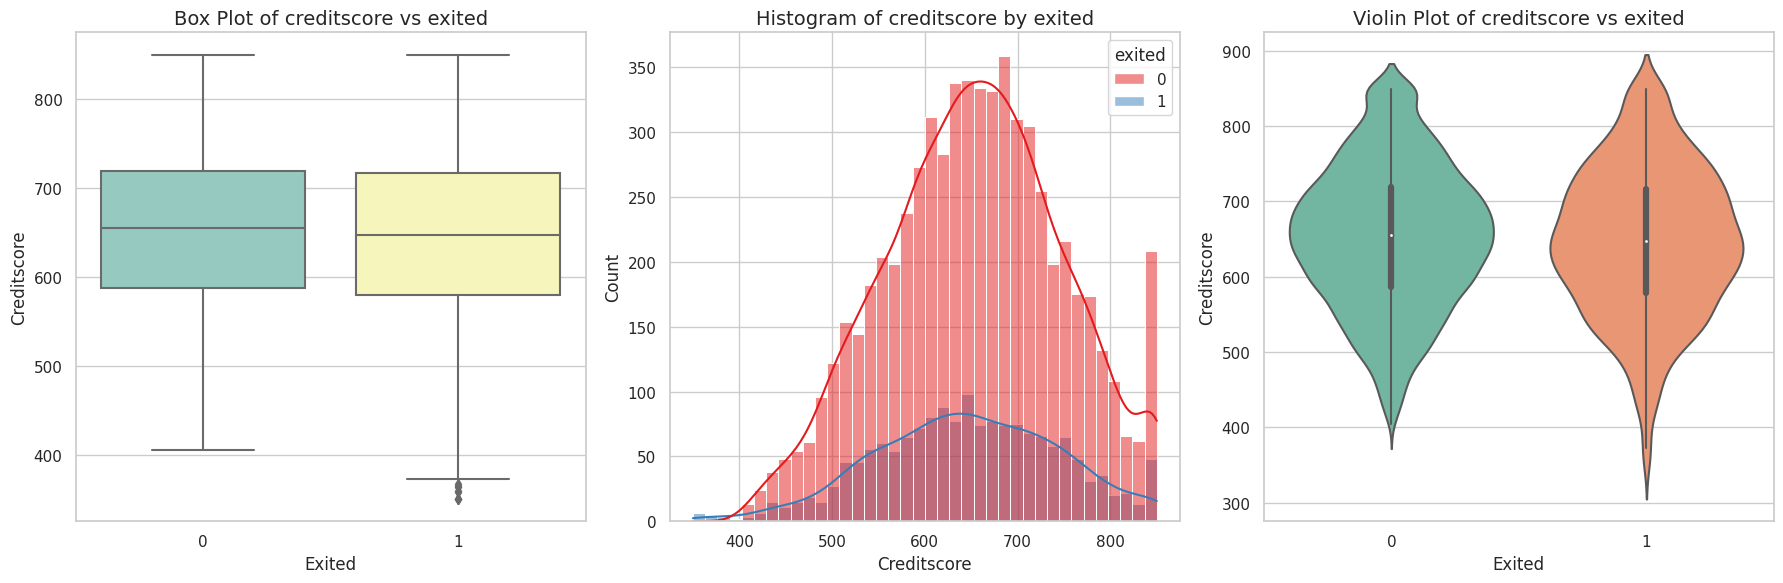

In [35]:
eda_numeric_vs_exited(traindf,"creditscore")

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-l

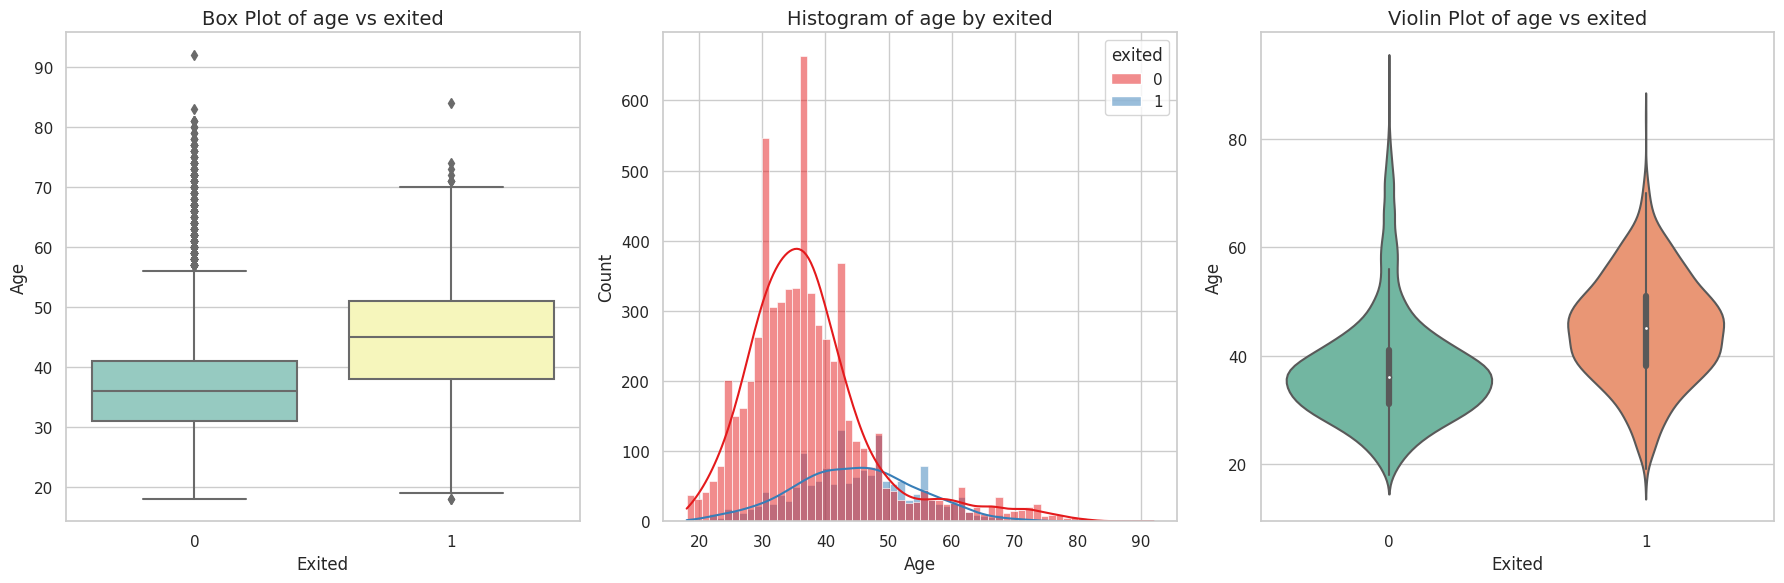

In [36]:
eda_numeric_vs_exited(traindf,"age")

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-l

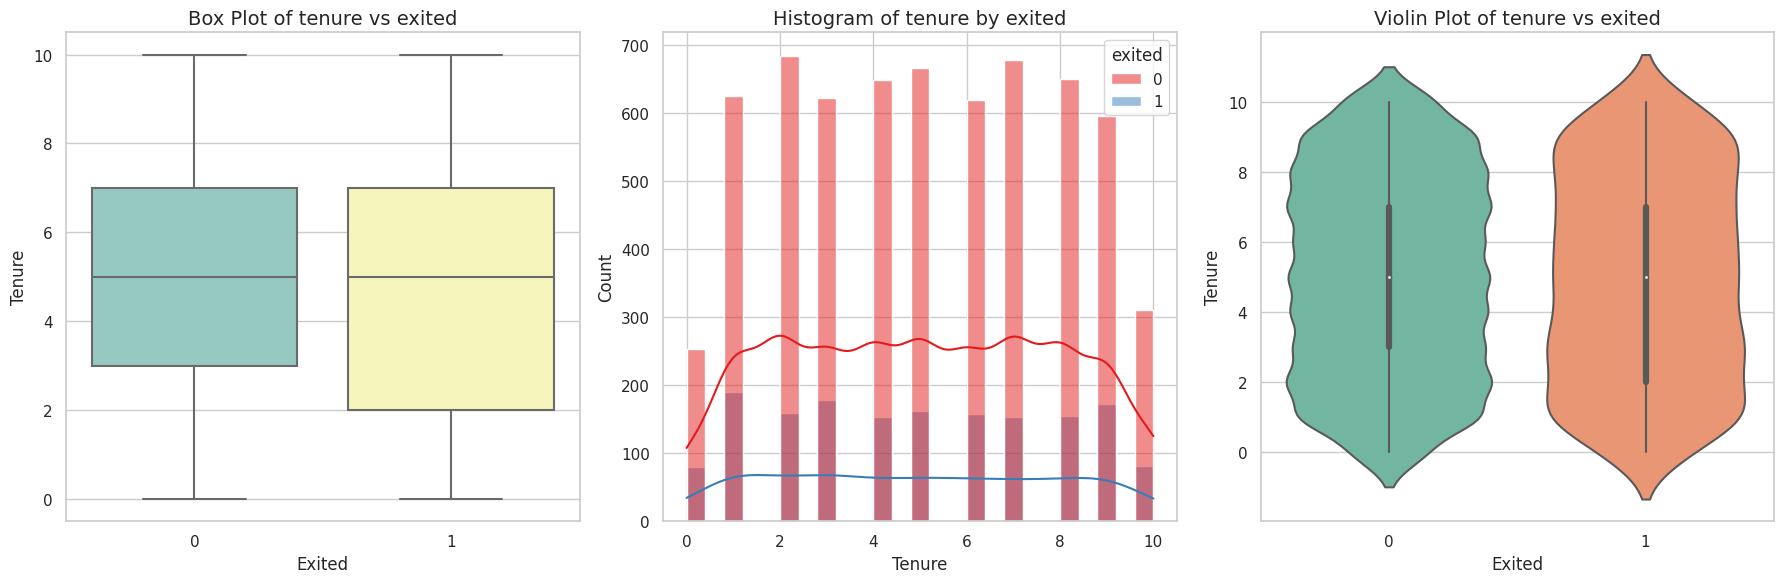

In [37]:
eda_numeric_vs_exited(traindf,"tenure")

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)


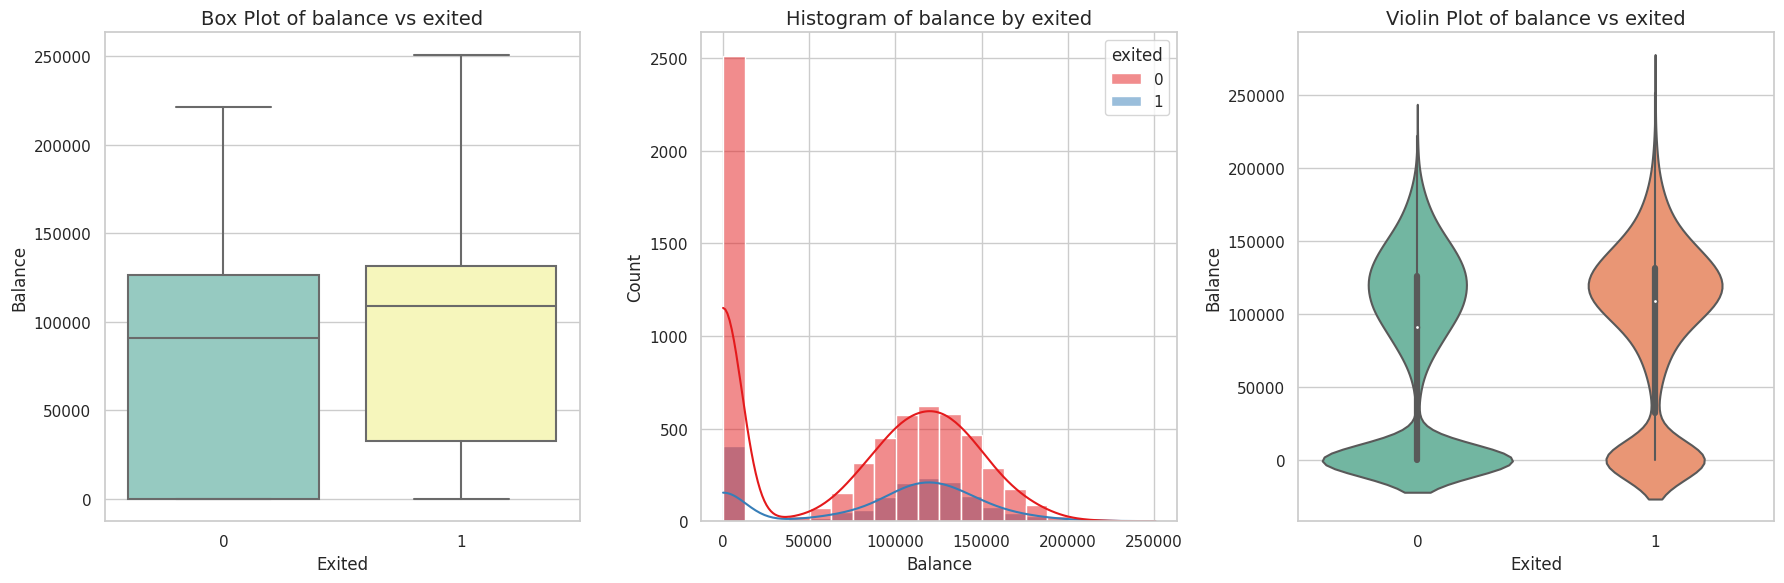

In [38]:
eda_numeric_vs_exited(traindf,"balance")

In [39]:
traindf.numofproducts.value_counts()

numofproducts
1    4052
2    3690
3     213
4      45
Name: count, dtype: int64

In [40]:
traindf.info()

<class 'pandas.core.frame.DataFrame'>
Index: 8000 entries, 9254 to 7270
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   rownumber        8000 non-null   int64  
 1   customerid       8000 non-null   int64  
 2   surname          8000 non-null   object 
 3   creditscore      8000 non-null   int64  
 4   geography        8000 non-null   object 
 5   gender           8000 non-null   object 
 6   age              8000 non-null   int64  
 7   tenure           8000 non-null   int64  
 8   balance          8000 non-null   float64
 9   numofproducts    8000 non-null   int64  
 10  hascrcard        8000 non-null   int64  
 11  isactivemember   8000 non-null   int64  
 12  estimatedsalary  8000 non-null   float64
 13  exited           8000 non-null   int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.2+ MB


before we apply hypothesis test to check the association between creditscore and exited , it's better to check if the creditscore meet the conditions to check normality of data to apply anova tes. we will use shapiro wilk test to check for normality of the data

In [41]:
import numpy as np
import pandas as pd
from scipy.stats import shapiro, levene, f_oneway, kruskal

def check_association(df, numeric_col, cat_col):
    """
    Function to check the association between a numeric column and a categorical column.
    1. Checks for normality using Shapiro-Wilk test.
    2. Checks for homogeneity of variance using Levene’s test.
    3. Applies ANOVA if assumptions hold, otherwise Kruskal-Wallis test.
    
    Parameters:
    df (DataFrame): The dataset
    numeric_col (str): Name of the numeric column
    cat_col (str): Name of the categorical column
    
    Returns:
    str: Result of the hypothesis test (either ANOVA or Kruskal-Wallis)
    """
    
    # Split data into groups based on the categorical column
    groups = [df[df[cat_col] == category][numeric_col] for category in df[cat_col].unique()]
    
    # Shapiro-Wilk Test for normality
    normality_results = []
    for group in groups:
        stat, p_value = shapiro(group)
        normality_results.append(p_value > 0.05)  # p-value > 0.05 means normal distribution
    
    # Check normality of all groups
    if all(normality_results):
        print("Data is normally distributed for all groups (according to Shapiro-Wilk test).")
    else:
        print("Data is not normally distributed for all groups. Applying Kruskal-Wallis.")
    
    # Levene’s Test for homogeneity of variance
    stat, p = levene(*groups)
    if p > 0.05:
        print("Variance is homogeneous (p-value from Levene's test > 0.05).")
        variance_homogeneous = True
    else:
        print("Variance is not homogeneous (p-value from Levene's test <= 0.05). Applying Kruskal-Wallis.")
        variance_homogeneous = False
    
    # Decide which test to run
    if all(normality_results) and variance_homogeneous:
        # Apply ANOVA if normality and variance homogeneity hold
        stat, p = f_oneway(*groups)
        print(f"ANOVA test result: Test Statistic = {stat}, p-value = {p}")
        if p > 0.05:
            return "Fail to reject null hypothesis: No significant difference between groups."
        else:
            return "Reject null hypothesis: Significant difference between groups."
    else:
        # Apply Kruskal-Wallis if assumptions are violated
        stat, p = kruskal(*groups)
        print(f"Kruskal-Wallis test result: Test Statistic = {stat}, p-value = {p}")
        if p > 0.05:
            return "Fail to reject null hypothesis: No significant difference between groups."
        else:
            return "Reject null hypothesis: Significant difference between groups."

# Example usage
# df is the dataframe, "CreditScore" is the numeric column, and "Exited" is the categorical column
result = check_association(traindf, 'creditscore', 'exited')
print(result)


Data is not normally distributed for all groups. Applying Kruskal-Wallis.
Variance is homogeneous (p-value from Levene's test > 0.05).
Kruskal-Wallis test result: Test Statistic = 5.253276760057241, p-value = 0.021905482552455714
Reject null hypothesis: Significant difference between groups.


/opt/conda/lib/python3.10/site-packages/scipy/stats/_axis_nan_policy.py:573: UserWarning: scipy.stats.shapiro: For N > 5000, computed p-value may not be accurate. Current N is 6356.
  res = hypotest_fun_out(*samples, **kwds)


In [42]:
traindf.info()

<class 'pandas.core.frame.DataFrame'>
Index: 8000 entries, 9254 to 7270
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   rownumber        8000 non-null   int64  
 1   customerid       8000 non-null   int64  
 2   surname          8000 non-null   object 
 3   creditscore      8000 non-null   int64  
 4   geography        8000 non-null   object 
 5   gender           8000 non-null   object 
 6   age              8000 non-null   int64  
 7   tenure           8000 non-null   int64  
 8   balance          8000 non-null   float64
 9   numofproducts    8000 non-null   int64  
 10  hascrcard        8000 non-null   int64  
 11  isactivemember   8000 non-null   int64  
 12  estimatedsalary  8000 non-null   float64
 13  exited           8000 non-null   int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.2+ MB


In [43]:
check_association(traindf,'age','exited')

Data is not normally distributed for all groups. Applying Kruskal-Wallis.
Variance is not homogeneous (p-value from Levene's test <= 0.05). Applying Kruskal-Wallis.
Kruskal-Wallis test result: Test Statistic = 828.9342278718212, p-value = 2.7629763280925028e-182


/opt/conda/lib/python3.10/site-packages/scipy/stats/_axis_nan_policy.py:573: UserWarning: scipy.stats.shapiro: For N > 5000, computed p-value may not be accurate. Current N is 6356.
  res = hypotest_fun_out(*samples, **kwds)


'Reject null hypothesis: Significant difference between groups.'

In [44]:
check_association(traindf,'balance','exited')

Data is not normally distributed for all groups. Applying Kruskal-Wallis.
Variance is not homogeneous (p-value from Levene's test <= 0.05). Applying Kruskal-Wallis.
Kruskal-Wallis test result: Test Statistic = 98.67365974610351, p-value = 2.977360762493754e-23


'Reject null hypothesis: Significant difference between groups.'

In [45]:
check_association(traindf,'tenure','exited')

Data is not normally distributed for all groups. Applying Kruskal-Wallis.
Variance is not homogeneous (p-value from Levene's test <= 0.05). Applying Kruskal-Wallis.
Kruskal-Wallis test result: Test Statistic = 1.4268713452292556, p-value = 0.23227571597301155


'Fail to reject null hypothesis: No significant difference between groups.'

In [46]:
traindf.info()

<class 'pandas.core.frame.DataFrame'>
Index: 8000 entries, 9254 to 7270
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   rownumber        8000 non-null   int64  
 1   customerid       8000 non-null   int64  
 2   surname          8000 non-null   object 
 3   creditscore      8000 non-null   int64  
 4   geography        8000 non-null   object 
 5   gender           8000 non-null   object 
 6   age              8000 non-null   int64  
 7   tenure           8000 non-null   int64  
 8   balance          8000 non-null   float64
 9   numofproducts    8000 non-null   int64  
 10  hascrcard        8000 non-null   int64  
 11  isactivemember   8000 non-null   int64  
 12  estimatedsalary  8000 non-null   float64
 13  exited           8000 non-null   int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.2+ MB


/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)


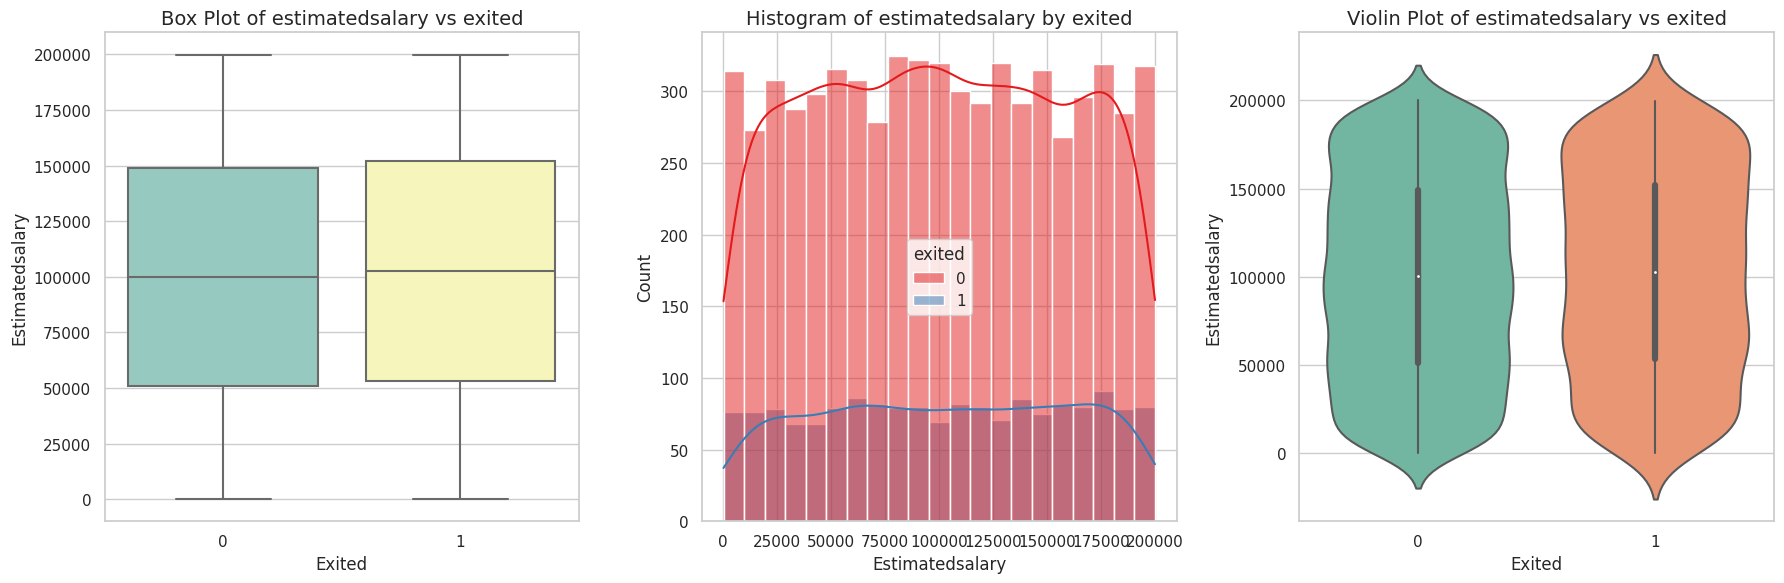

In [47]:
eda_numeric_vs_exited(traindf,'estimatedsalary')

In [48]:
check_association(traindf,'estimatedsalary','exited')

Data is not normally distributed for all groups. Applying Kruskal-Wallis.
Variance is homogeneous (p-value from Levene's test > 0.05).
Kruskal-Wallis test result: Test Statistic = 0.9479608850344579, p-value = 0.3302388801331404


/opt/conda/lib/python3.10/site-packages/scipy/stats/_axis_nan_policy.py:573: UserWarning: scipy.stats.shapiro: For N > 5000, computed p-value may not be accurate. Current N is 6356.
  res = hypotest_fun_out(*samples, **kwds)


'Fail to reject null hypothesis: No significant difference between groups.'

In [49]:
traindf['numofproducts'].value_counts()

numofproducts
1    4052
2    3690
3     213
4      45
Name: count, dtype: int64

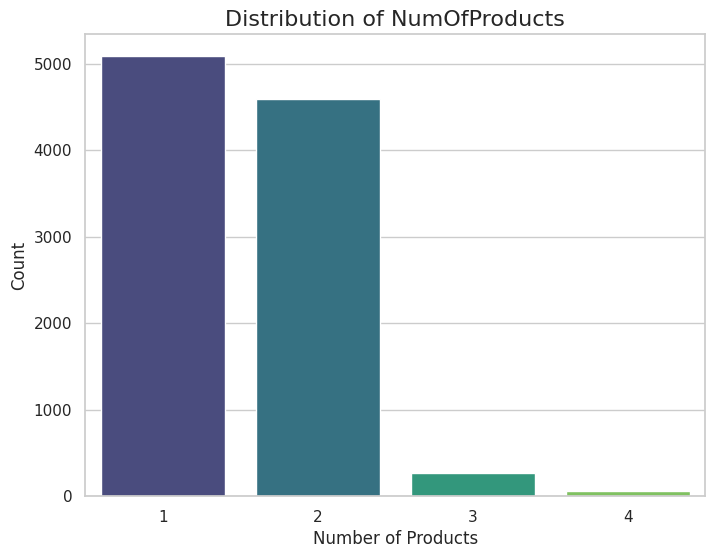

In [50]:
import seaborn as sns
import matplotlib.pyplot as plt

# Set up the plot size
plt.figure(figsize=(8, 6))

# Plot a countplot (bar chart) for NumOfProducts
sns.countplot(x='numofproducts', data=df, palette='viridis')

# Add titles and labels
plt.title('Distribution of NumOfProducts', fontsize=16)
plt.xlabel('Number of Products', fontsize=12)
plt.ylabel('Count', fontsize=12)

# Show the plot
plt.show()


Contingency Table:
exited            0     1
numofproducts            
1              2915  1137
2              3409   281
3                32   181
4                 0    45


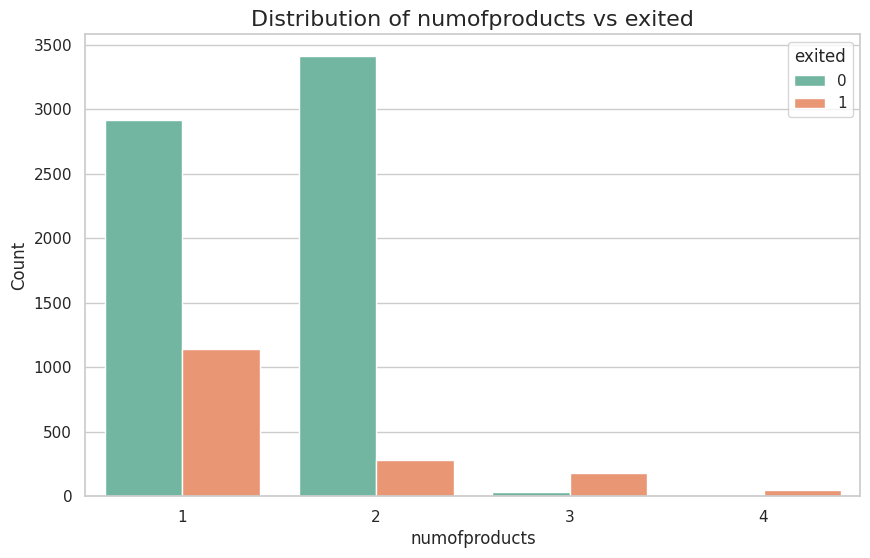

Chi-Square Statistic: 1233.5955
Degrees of Freedom: 3
Expected Frequencies:
[[3219.314   832.686 ]
 [2931.705   758.295 ]
 [ 169.2285   43.7715]
 [  35.7525    9.2475]]
P-value: 0.0000
Reject the null hypothesis: There is a significant association between the variables.


In [51]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import chi2_contingency

def eda_categorical_relationship(df, cat_col, target_col='exited'):
    # Create a contingency table
    contingency_table = pd.crosstab(df[cat_col], df[target_col])
    # Print the contingency table
    print("Contingency Table:")
    print(contingency_table)

    # Plot the relationship using a count plot
    plt.figure(figsize=(10, 6))
    sns.countplot(data=df, x=cat_col, hue=target_col, palette='Set2')
    plt.title(f'Distribution of {cat_col} vs {target_col}', fontsize=16)
    plt.xlabel(cat_col, fontsize=12)
    plt.ylabel('Count', fontsize=12)
    plt.legend(title=target_col)
    plt.show()

    # Perform Chi-Square test
    chi2, p, dof, expected = chi2_contingency(contingency_table)
    
    # Print results
    print(f"Chi-Square Statistic: {chi2:.4f}")
    print(f"Degrees of Freedom: {dof}")
    print(f"Expected Frequencies:\n{expected}")
    print(f"P-value: {p:.4f}")

    # Interpret the result
    alpha = 0.05
    if p < alpha:
        print("Reject the null hypothesis: There is a significant association between the variables.")
    else:
        print("Fail to reject the null hypothesis: There is no significant association between the variables.")

# Example usage:
eda_categorical_relationship(traindf, 'numofproducts')


In [52]:
traindf.info()

<class 'pandas.core.frame.DataFrame'>
Index: 8000 entries, 9254 to 7270
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   rownumber        8000 non-null   int64  
 1   customerid       8000 non-null   int64  
 2   surname          8000 non-null   object 
 3   creditscore      8000 non-null   int64  
 4   geography        8000 non-null   object 
 5   gender           8000 non-null   object 
 6   age              8000 non-null   int64  
 7   tenure           8000 non-null   int64  
 8   balance          8000 non-null   float64
 9   numofproducts    8000 non-null   int64  
 10  hascrcard        8000 non-null   int64  
 11  isactivemember   8000 non-null   int64  
 12  estimatedsalary  8000 non-null   float64
 13  exited           8000 non-null   int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.2+ MB


Contingency Table:
exited             0     1
isactivemember            
0               2844  1054
1               3512   590


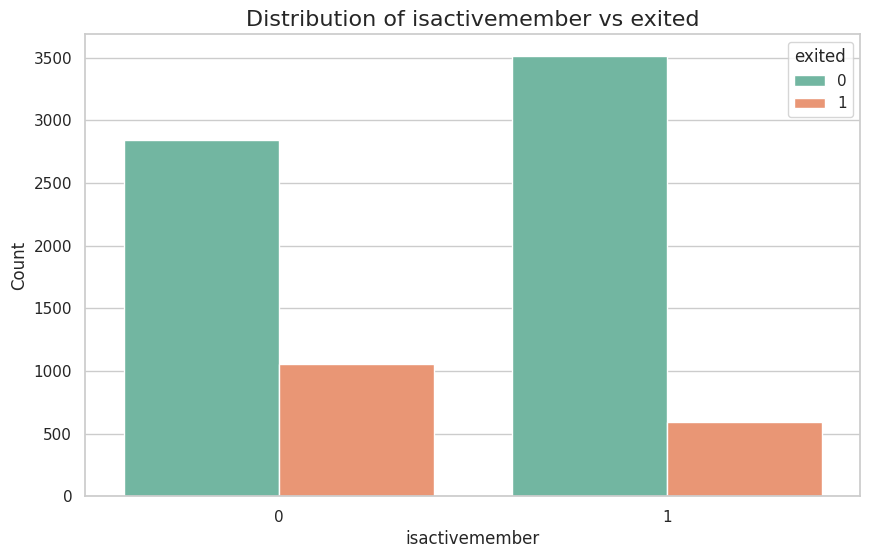

Chi-Square Statistic: 195.3149
Degrees of Freedom: 1
Expected Frequencies:
[[3096.961  801.039]
 [3259.039  842.961]]
P-value: 0.0000
Reject the null hypothesis: There is a significant association between the variables.


In [53]:
eda_categorical_relationship(traindf,'isactivemember')

Contingency Table:
exited        0     1
hascrcard            
0          1875   497
1          4481  1147


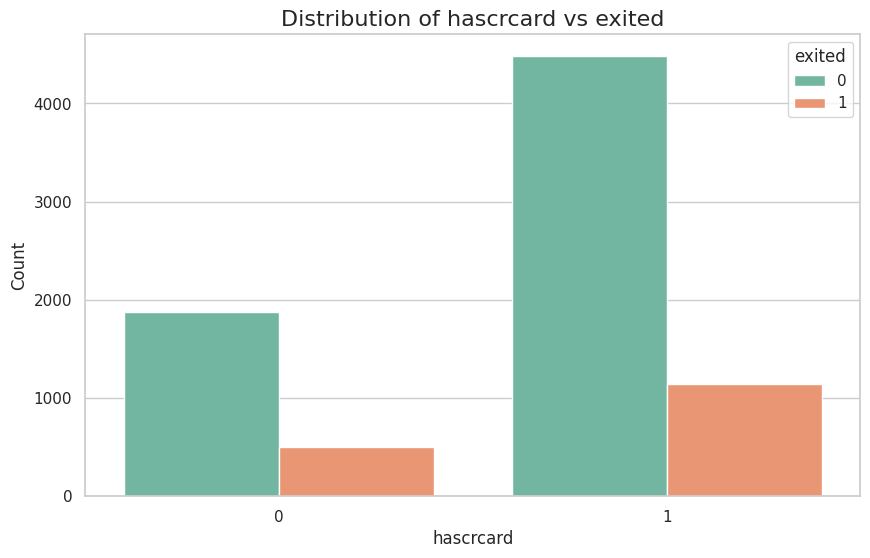

Chi-Square Statistic: 0.3009
Degrees of Freedom: 1
Expected Frequencies:
[[1884.554  487.446]
 [4471.446 1156.554]]
P-value: 0.5833
Fail to reject the null hypothesis: There is no significant association between the variables.


In [54]:
eda_categorical_relationship(traindf,'hascrcard')

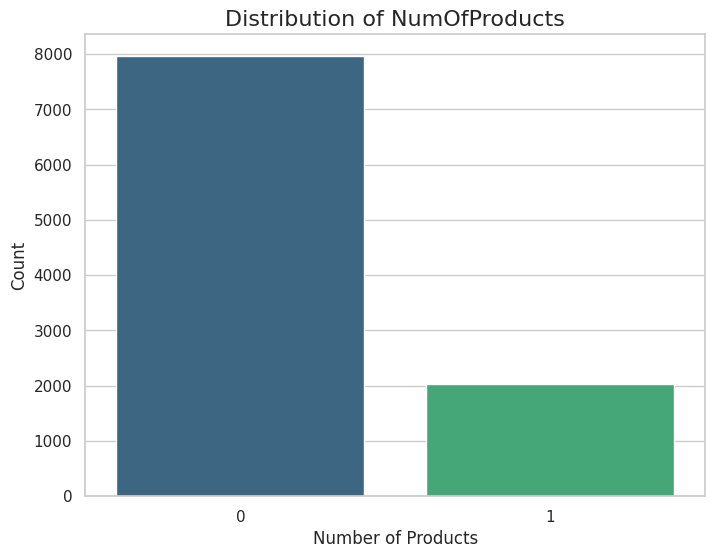

In [55]:
import seaborn as sns
import matplotlib.pyplot as plt

# Set up the plot size
plt.figure(figsize=(8, 6))

# Plot a countplot (bar chart) for NumOfProducts
sns.countplot(x='exited', data=df, palette='viridis')

# Add titles and labels
plt.title('Distribution of NumOfProducts', fontsize=16)
plt.xlabel('Number of Products', fontsize=12)
plt.ylabel('Count', fontsize=12)

# Show the plot
plt.show()

**Feature engineering**

In [56]:
traindf.info()

<class 'pandas.core.frame.DataFrame'>
Index: 8000 entries, 9254 to 7270
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   rownumber        8000 non-null   int64  
 1   customerid       8000 non-null   int64  
 2   surname          8000 non-null   object 
 3   creditscore      8000 non-null   int64  
 4   geography        8000 non-null   object 
 5   gender           8000 non-null   object 
 6   age              8000 non-null   int64  
 7   tenure           8000 non-null   int64  
 8   balance          8000 non-null   float64
 9   numofproducts    8000 non-null   int64  
 10  hascrcard        8000 non-null   int64  
 11  isactivemember   8000 non-null   int64  
 12  estimatedsalary  8000 non-null   float64
 13  exited           8000 non-null   int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.2+ MB


columns not adding signnificant value-:
1. rownumber
2. customerid
3. surname
4. tenure
5. estimated_salary
6. hascard

In [57]:
traindf.drop(columns=['rownumber','customerid','surname','tenure','estimatedsalary','hascrcard'],inplace=True)

In [58]:
traindf

,creditscore,geography,gender,age,balance,numofproducts,isactivemember,exited
9254,686,France,Male,32,0.00,2,1,0
1561,632,Germany,Male,42,119624.60,2,1,0
1670,559,Spain,Male,24,114739.92,1,0,1
6087,561,France,Female,27,135637.00,1,0,1
6669,517,France,Male,56,142147.32,1,0,1
...,...,...,...,...,...,...,...,...
5734,768,France,Male,54,69712.74,1,1,0
5191,682,France,Female,58,0.00,1,1,0
5390,735,France,Female,38,0.00,3,0,1
860,667,France,Male,43,190227.46,1,0,1


In [59]:
traindf.isactivemember.value_counts()

isactivemember
1    4102
0    3898
Name: count, dtype: int64

In [60]:
traindf

,creditscore,geography,gender,age,balance,numofproducts,isactivemember,exited
9254,686,France,Male,32,0.00,2,1,0
1561,632,Germany,Male,42,119624.60,2,1,0
1670,559,Spain,Male,24,114739.92,1,0,1
6087,561,France,Female,27,135637.00,1,0,1
6669,517,France,Male,56,142147.32,1,0,1
...,...,...,...,...,...,...,...,...
5734,768,France,Male,54,69712.74,1,1,0
5191,682,France,Female,58,0.00,1,1,0
5390,735,France,Female,38,0.00,3,0,1
860,667,France,Male,43,190227.46,1,0,1


In [65]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import OneHotEncoder

def preprocess_dataframe(df, categorical_columns, numeric_columns, binary_columns, unchanged_columns, target_column):
    # Split the dataframe into features (X) and target (y)
    X = df.drop(columns=[target_column])
    y = df[target_column]

    # Create the preprocessing steps
    categorical_transformer = OneHotEncoder(drop='first', sparse=False)
    numeric_transformer = StandardScaler()

    # Combine preprocessing steps
    
    preprocessor = ColumnTransformer(
        transformers=[
            ('num', numeric_transformer, numeric_columns),
            ('cat', categorical_transformer, categorical_columns)
        ],
        remainder='passthrough')  # This will leave the binary and unchanged columns untouched

    # Determine the columns to be passed through unchanged
    passthrough_columns = binary_columns + unchanged_columns

    # Reorder columns to ensure correct alignment after transformation
    X = X[numeric_columns + categorical_columns + passthrough_columns]

    # Fit and transform the data
    X_processed = preprocessor.fit_transform(X)

    # Get feature names after preprocessing
    onehot_columns = preprocessor.named_transformers_['cat'].get_feature_names_out(categorical_columns)
    feature_names = numeric_columns + list(onehot_columns) + passthrough_columns

    # Convert to dataframe
    X_processed_df = pd.DataFrame(X_processed, columns=feature_names, index=X.index)

    return X_processed_df, y, preprocessor

# Example usage:
categorical_columns = ['geography', 'gender']
numeric_columns = ['creditscore', 'age', 'balance']
binary_columns = ['isactivemember']
unchanged_columns = ['numofproducts']
X_train_processed, y_train, preprocessor = preprocess_dataframe(traindf, categorical_columns, numeric_columns, binary_columns, unchanged_columns, 'exited')

/opt/conda/lib/python3.10/site-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


In [66]:
X_train_processed

,creditscore,age,balance,geography_Germany,geography_Spain,gender_Male,isactivemember,numofproducts
9254,0.356500,-0.655786,-1.218471,0.0,0.0,1.0,1.0,2.0
1561,-0.203898,0.294938,0.696838,1.0,0.0,1.0,1.0,2.0
1670,-0.961472,-1.416365,0.618629,0.0,1.0,1.0,0.0,1.0
6087,-0.940717,-1.131148,0.953212,0.0,0.0,0.0,0.0,1.0
6669,-1.397337,1.625953,1.057449,0.0,0.0,1.0,0.0,1.0
...,...,...,...,...,...,...,...,...
5734,1.207474,1.435808,-0.102301,0.0,0.0,1.0,1.0,1.0
5191,0.314989,1.816097,-1.218471,0.0,0.0,0.0,1.0,1.0
5390,0.865009,-0.085351,-1.218471,0.0,0.0,0.0,0.0,3.0
860,0.159323,0.390011,1.827259,0.0,0.0,1.0,0.0,1.0


In [63]:
y_train

9254    0
1561    0
1670    1
6087    1
6669    1
       ..
5734    0
5191    0
5390    1
860     1
7270    0
Name: exited, Length: 8000, dtype: int64

In [64]:
preprocessor


ColumnTransformer(remainder='passthrough',
                  transformers=[('num', StandardScaler(),
                                 ['creditscore', 'age', 'balance']),
                                ('cat',
                                 OneHotEncoder(drop='first', sparse=False),
                                 ['geography', 'gender'])])

**Hyperparamter tuning**

**scope for tuning**

1. learning_rate
2. number of layers
3. no of units/ neurons


In [67]:
import numpy as np
import torch
import torch.nn as nn
from torch.utils.data import DataLoader, TensorDataset
from sklearn.model_selection import KFold


In [103]:
X_tensor = torch.FloatTensor(X_train_processed.to_numpy())
y_tensor = torch.FloatTensor(y_train.to_numpy().reshape(-1,1))

In [104]:
# Print shapes to verify
print(f"X_tensor shape: {X_tensor.shape}")
print(f"y_tensor shape: {y_tensor.shape}")

X_tensor shape: torch.Size([8000, 8])
y_tensor shape: torch.Size([8000, 1])


In [105]:
class ANN(nn.Module):
    def __init__(self, input_size, hidden_size, output_size):
        super(ANN, self).__init__()
        self.fc1 = nn.Linear(input_size, hidden_size)
        self.fc2 = nn.Linear(hidden_size, hidden_size)
        self.fc3 = nn.Linear(hidden_size, output_size)
        self.relu = nn.ReLU()
        self.sigmoid = nn.Sigmoid()

    def forward(self, x):
        x = self.relu(self.fc1(x))
        x = self.relu(self.fc2(x))
        x = self.sigmoid(self.fc3(x))
        return x

In [106]:
class EarlyStopping:
    def __init__(self, patience=7, min_delta=0):
        self.patience = patience
        self.min_delta = min_delta
        self.counter = 0
        self.best_loss = None
        self.early_stop = False

    def __call__(self, val_loss):
        if self.best_loss is None:
            self.best_loss = val_loss
        elif val_loss > self.best_loss - self.min_delta:
            self.counter += 1
            if self.counter >= self.patience:
                self.early_stop = True
        else:
            self.best_loss = val_loss
            self.counter = 0

In [107]:
# Hyperparameter tuning function (unchanged)
def train_and_evaluate(model, train_loader, val_loader, criterion, optimizer, device, epochs=100, patience=7):
    model.to(device)
    early_stopping = EarlyStopping(patience=patience)
    
    for epoch in range(epochs):
        model.train()
        for inputs, targets in train_loader:
            inputs, targets = inputs.to(device), targets.to(device)
            optimizer.zero_grad()
            outputs = model(inputs)
            loss = criterion(outputs, targets)
            loss.backward()
            optimizer.step()

        model.eval()
        val_loss = 0
        with torch.no_grad():
            for inputs, targets in val_loader:
                inputs, targets = inputs.to(device), targets.to(device)
                outputs = model(inputs)
                val_loss += criterion(outputs, targets).item()
        val_loss /= len(val_loader)
        
        early_stopping(val_loss)
        if early_stopping.early_stop:
            print(f"Early stopping triggered at epoch {epoch}")
            break
    
    return val_loss

In [108]:
k_folds = 5
kf = KFold(n_splits=k_folds, shuffle=True, random_state=42)
# Hyperparameters
input_size = X_train_np.shape[1]  # This should now be 8
hidden_size = 64
output_size = 1  # Binary classification
batch_size = 32
epochs = 100
learning_rates = [0.001, 0.01, 0.1]  # Three different learning rates
patience = 7  # for early stopping

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

best_lr = None
best_val_loss = float('inf')

for lr in learning_rates:
    val_losses = []
    for fold, (train_idx, val_idx) in enumerate(kf.split(X_tensor)):
        X_train_fold, X_val_fold = X_tensor[train_idx], X_tensor[val_idx]
        y_train_fold, y_val_fold = y_tensor[train_idx], y_tensor[val_idx]

        train_dataset = TensorDataset(X_train_fold, y_train_fold)
        val_dataset = TensorDataset(X_val_fold, y_val_fold)

        train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True)
        val_loader = DataLoader(val_dataset, batch_size=batch_size)

        model = ANN(input_size, hidden_size, output_size)
        criterion = nn.BCELoss()  # Binary Cross Entropy Loss
        optimizer = torch.optim.Adam(model.parameters(), lr=lr)

        val_loss = train_and_evaluate(model, train_loader, val_loader, criterion, optimizer, device, epochs, patience)
        val_losses.append(val_loss)

    avg_val_loss = np.mean(val_losses)
    print(f"Learning rate: {lr}, Average validation loss: {avg_val_loss}")

    if avg_val_loss < best_val_loss:
        best_val_loss = avg_val_loss
        best_lr = lr

print(f"Best learning rate: {best_lr}")

Early stopping triggered at epoch 28
Early stopping triggered at epoch 20
Early stopping triggered at epoch 27
Early stopping triggered at epoch 27
Early stopping triggered at epoch 22
Learning rate: 0.001, Average validation loss: 0.3402189967930317
Early stopping triggered at epoch 11
Early stopping triggered at epoch 19
Early stopping triggered at epoch 14
Early stopping triggered at epoch 28
Early stopping triggered at epoch 19
Learning rate: 0.01, Average validation loss: 0.3584882610440254
Early stopping triggered at epoch 20
Early stopping triggered at epoch 7
Early stopping triggered at epoch 12
Early stopping triggered at epoch 13
Early stopping triggered at epoch 24
Learning rate: 0.1, Average validation loss: 0.4251920399069786
Best learning rate: 0.001


In [109]:
# Train final model with best learning rate
final_model = ANN(input_size, hidden_size, output_size)
final_criterion = nn.BCELoss()
final_optimizer = torch.optim.Adam(final_model.parameters(), lr=best_lr)

final_dataset = TensorDataset(X_tensor, y_tensor)
final_loader = DataLoader(final_dataset, batch_size=batch_size, shuffle=True)

train_and_evaluate(final_model, final_loader, final_loader, final_criterion, final_optimizer, device, epochs, patience)

# Save the model
torch.save(final_model.state_dict(), 'best_ann_model.pth')

# Print model architecture
print(final_model)

Early stopping triggered at epoch 81
ANN(
  (fc1): Linear(in_features=8, out_features=64, bias=True)
  (fc2): Linear(in_features=64, out_features=64, bias=True)
  (fc3): Linear(in_features=64, out_features=1, bias=True)
  (relu): ReLU()
  (sigmoid): Sigmoid()
)


In [114]:
from sklearn.metrics import accuracy_score, f1_score

# Assuming X_train, y_train, X_test, y_test, and preprocessor are available

# Preprocess X_test
X_test_processed = preprocessor.transform(X_test)
X_test_processed.shape

(2000, 8)

In [115]:
X_test_tensor = torch.FloatTensor(X_test_processed)
y_test_tensor = torch.FloatTensor(y_test.to_numpy().reshape(-1, 1))

In [126]:
final_model.eval()
with torch.no_grad():
    y_pred = final_model(X_test_tensor.to(device)).cpu().numpy()

# Convert predictions to binary (0 or 1)
y_pred_binary = (y_pred > 0.30).astype(int)

# Calculate accuracy and F1 score
accuracy = accuracy_score(y_test, y_pred_binary)
f1 = f1_score(y_test, y_pred_binary)

print(f"Test Accuracy: {accuracy:.4f}")
print(f"Test F1 Score: {f1:.4f}")




Test Accuracy: 0.8450
Test F1 Score: 0.6066
